# Proyecto 1: Descargando datos de la web
Curso Ingeniería de Características


**Estephania Pivac Alcaraz**

---

Problema de interés:
Estudar la relación que existe entre la cantidad de accidentes de tránsito y la inversión a la conservación de carreteras

## 1. Descargando los datos

Comenzamos cargando las bibliotecas necesarias.

In [161]:
import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import pandas as pd # Solo para ver el archivo descargado
import zipfile # Descompresión de archivos

Creamos los subdirectorios para guardar los datos de manera ordenada.

In [162]:
# pwd
print(os.getcwd())

#  Estos son los datos que vamos a descargar y donde vamos a guardarlos
accidentes_transito_2021_url = "https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/atus_anual_csv.zip"
accidentes_transito_2021_archivo = "accidentes_transito_2021.zip"

conservacion_carreteras_2019_url = "https://data.sct.gob.mx/datos/datos/abiertos/21101DGCCProgramaNacionalC.csv"
conservacion_carreteras_2019_archivo = "conservacion_carreteras_2019.csv"
subdir = "./data/" 

/content


Revisamos si ya existen los subdirectorios. Si no es así los creamos.

Enseguida, abrimos las url de los archivos, extraemos contenidos de los zip y los guardamos.

In [163]:
# Revisamos si el archivo existe. Si no existe, se procede a crearlo.
if not os.path.exists(accidentes_transito_2021_archivo):
  # Revisamos si el directorio existe. Si no es así procedemos a crearlo.
  if not os.path.exists(subdir):
    #Creamos el directorio 
    os.makedirs(subdir)
  # Abrimos la url y guardamos el objeto en mortalidad_2020_archivo
  urllib.request.urlretrieve(accidentes_transito_2021_url, subdir + accidentes_transito_2021_archivo)  
  # Extraemos el contenido del zip y lo guardamos.
  with zipfile.ZipFile(subdir + accidentes_transito_2021_archivo, "r") as zip_ref:
    zip_ref.extractall(subdir)

if not os.path.exists(conservacion_carreteras_2019_archivo):
    urllib.request.urlretrieve(conservacion_carreteras_2019_url, subdir + conservacion_carreteras_2019_archivo) 
    

Creamos un archivo tipo txt, con la información de las bases de datos y las fuentes de donde obtuvimos la información.

In [164]:
with open(subdir + "info.txt", 'w') as f:
  f.write("Archivos sobre accidentes de tránsito \n")
  info = """
  accidentes_transito_2021: Esta estadística mide la siniestralidad del 
  transporte a nivel nacional, y se genera a partir del acopio y procesamiento 
  de los datos alusivos a los accidentes ocurren en zonas no federales. Esta 
  información contribuyó a la planeación, organización del transporte y 
  la prevención de accidentes.
  Esta base de datos se obtuvo del sitio del INEGI:
  https://www.inegi.org.mx/programas/accidentes/#Datos_abiertos
  
  El objetivo principal de esta base de datos es producir información anual 
  sobre la siniestralidad del transporte terrestre a nivel nacional, entidad 
  federativa y municipio, mediante el acopio y procesamiento de datos alusivos 
  a los accidentes ocurridos en zonas no federales, contribuyendo con ello a 
  la planeación y organización del transporte.

  Se dispone de la estadística desde 1997 (la difusión se realiza siete meses 
  posteriores al término del año de referencia de la información).

  Cobertura temática
  Características de los accidentes de tránsito ocurridos en zonas no federales, 
  tales como:

      Hora de ocurrencia del accidente.
      Fecha de ocurrencia del accidente.
      Zona de ocurrencia del accidente.
      Clase de accidente.
      Tipo de accidente.
      Tipo de vehículo involucrado.
      Causa determinante o presunta del accidente.
      Superficie de rodamiento.
      Tipo de víctimas.
      Clase de víctima.
      Clasificador utilizado
      Estadísticas de transporte por carretera, del Instituto Interamericano de 
      Estadística.


  conservacion_carreteras_2019_archivo: Esta base de datos contiene información
  sobre el avance físico-financiero de obras públicas en tramos y puentes en 
  carreteras federales libres de peaje, del Programa Nacional de Conservación de 
  Carreteras. 

  Los datos se obtuvieron de datos abiertos del Gobierno de México de la 
  Secretaría de Comunicación y Transporte con fechas 15 de octubre de 2022, 
  estos datos se actualizan de manera irregular. La última actualización se 
  llevó a cabo en 2019-06-28. 

  Esta base de datos se obtuvo del sitio de Gobierno de México:
  https://datos.gob.mx/busca/dataset/infraestructura-carretera/resource/e75840ff-4b48-48b7-a302-7ce8546576a6

  """ 
  f.write(info + '\n')
  f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
  f.write("Desde: " + accidentes_transito_2021_url + "\n")
  f.write("Nombre: " + accidentes_transito_2021_archivo + "\n")
  f.write("Agregados conservación de carreteras 2019 desde: " + conservacion_carreteras_2019_url + "\n")
  f.write("Nombre: " + conservacion_carreteras_2019_archivo + "\n")

Se pretende realizar un estudio donde podamos ver cómo han evolucionado los accidentes viales, en qué estados de la República son más comunes. También resulta de interés saber cual es el efecto que ha tenido toda la inversión realizada en el programa de conservación de carreteras, y cómo ha contribuido a que Sonora cuente con carreteras más seguras.

### Accidentes de tránsito terrestre en zonas urbanas y suburbanas

Exploremos las primeras bases de datos.

In [350]:
df_accidentes_2021 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2021.csv", index_col=False)
df_accidentes = df_accidentes_2021

# Creamos data frames de los accidentes de tránsito desde 2017
df_accidentes_2020 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2020.csv", index_col=False)
df_accidentes_2019 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2019.csv", index_col=False)
df_accidentes_2018 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2018.csv", index_col=False)
df_accidentes_2017 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2017.csv", index_col=False)

# Agregamos únicamente los datos del estado de Sonora
df_accidentes = df_accidentes.append(df_accidentes_2020)
df_accidentes = df_accidentes.append(df_accidentes_2019)
df_accidentes = df_accidentes.append(df_accidentes_2018)
df_accidentes = df_accidentes.append(df_accidentes_2017)

df_accidentes.reset_index(drop = True)

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,...,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802667,Municipal,32,56,2017,12,3,33,21,Jueves,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
1802668,Municipal,32,56,2017,12,22,0,22,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
1802669,Municipal,32,56,2017,12,3,45,23,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas
1802670,Municipal,32,56,2017,12,5,20,23,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas


In [351]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802672 entries, 0 to 367788
Data columns (total 45 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   COBERTURA     object
 1   ID_ENTIDAD    int64 
 2   ID_MUNICIPIO  int64 
 3   ANIO          int64 
 4   MES           int64 
 5   ID_HORA       int64 
 6   ID_MINUTO     int64 
 7   ID_DIA        int64 
 8   DIASEMANA     object
 9   URBANA        object
 10  SUBURBANA     object
 11  TIPACCID      object
 12  AUTOMOVIL     int64 
 13  CAMPASAJ      int64 
 14  MICROBUS      int64 
 15  PASCAMION     int64 
 16  OMNIBUS       int64 
 17  TRANVIA       int64 
 18  CAMIONETA     int64 
 19  CAMION        int64 
 20  TRACTOR       int64 
 21  FERROCARRI    int64 
 22  MOTOCICLET    int64 
 23  BICICLETA     int64 
 24  OTROVEHIC     int64 
 25  CAUSAACCI     object
 26  CAPAROD       object
 27  SEXO          object
 28  ALIENTO       object
 29  CINTURON      object
 30  ID_EDAD       int64 
 31  CONDMUERTO    int64 
 32 

Como solo nos interesan los accidentes en carretera, nos quedaremos con los accidentes de tránsito en area "Suburbana"

In [352]:
df_accidentes['SUBURBANA'].value_counts()

Sin accidente en esta zona        1665900
Accidente en carretera estatal      91640
Accidente en camino rural           23934
Accidentes en otro camino           21198
Name: SUBURBANA, dtype: int64

In [324]:
df_accidentes['URBANA'].value_counts()

Accidente en intersección       1500391
Sin accidente en esta zona       201552
Accidente en no intersección     100729
Name: URBANA, dtype: int64

In [353]:
# Solo nos quedamos con los accidentes en área suburbana "Accidente en camino estatal"
df_accidentes = df_accidentes[df_accidentes['SUBURBANA'] == 'Accidente en carretera estatal']
df_accidentes.pop('URBANA')
df_accidentes.pop('SUBURBANA')
df_accidentes

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
33,Municipal,1,1,2021,1,20,45,3,Domingo,Salida del camino,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
47,Municipal,1,1,2021,1,20,1,4,lunes,Salida del camino,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
153,Municipal,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
209,Municipal,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
220,Municipal,1,1,2021,1,3,0,26,Martes,Salida del camino,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,Municipal,32,48,2017,12,14,45,4,Lunes,Salida del camino,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
367718,Municipal,32,51,2017,12,2,50,24,Domingo,Volcadura,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
367719,Municipal,32,51,2017,12,15,45,26,Martes,Volcadura,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
367720,Municipal,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas


In [354]:
drop_col = ['CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'COBERTURA', 'ESTATUS']
for x in drop_col:
  df_accidentes.pop(x)
df_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,...,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CLASACC
33,1,1,2021,1,20,45,3,Domingo,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Hombre,Se ignora,Se ignora,30,Sólo daños
47,1,1,2021,1,20,1,4,lunes,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Mujer,Se ignora,Se ignora,17,No fatal
153,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,2,...,0,0,0,Conductor,Pavimentada,Hombre,Se ignora,Se ignora,54,Sólo daños
209,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,2,...,0,0,0,Conductor,Pavimentada,Mujer,Sí,Se ignora,30,Sólo daños
220,1,1,2021,1,3,0,26,Martes,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,Sólo daños
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,32,48,2017,12,14,45,4,Lunes,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,Fatal
367718,32,51,2017,12,2,50,24,Domingo,Volcadura,0,...,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,46,Fatal
367719,32,51,2017,12,15,45,26,Martes,Volcadura,0,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,Fatal
367720,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,0,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,No fatal


## 2.  Variables cualitativas


Para facilitar nuestro análisis y la agregación de algunas columnas recodificaremos las variables cualitativas a variables dummy.

Exploremos un poco lo que sucede con las variables cualitativas de nuestro data frame.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


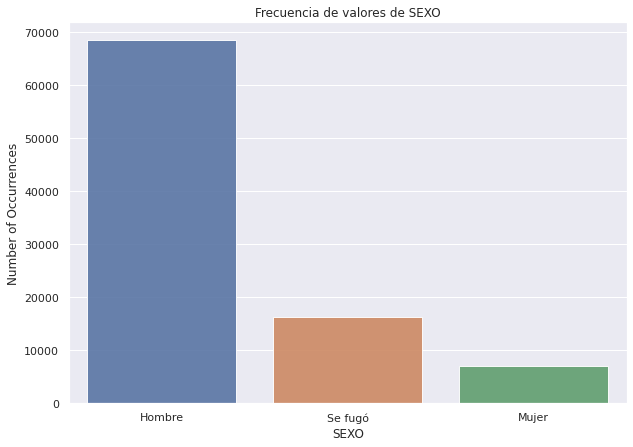

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

sexo_count = df_accidentes['SEXO'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(sexo_count.index, sexo_count.values, alpha=0.9)

plt.title('Frecuencia de valores de SEXO')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('SEXO', fontsize=12)
plt.show()

In [341]:
df_accidentes['SEXO'].value_counts()

Hombre     68406
Se fugó    16236
Mujer       6998
Name: SEXO, dtype: int64

In [342]:
df_accidentes['TIPACCID'].value_counts()

Colisión con vehículo automotor          35128
Salida del camino                        16549
Volcadura                                13434
Colisión con objeto fijo                 10191
Colisión con motocicleta                  9071
Colisión con animal                       2043
Colisión con peatón (atropellamiento)     1864
Otro                                      1474
Colisión con ciclista                      787
Caída de pasajero                          615
Incendio                                   311
Colisión con ferrocarril                   173
Name: TIPACCID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


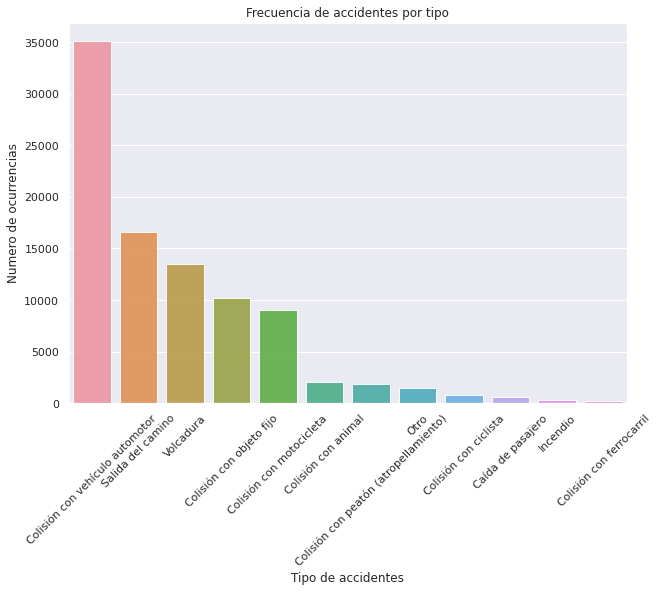

In [356]:
tipo_acc_count = df_accidentes['TIPACCID'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(tipo_acc_count.index, tipo_acc_count.values, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Numero de ocurrencias', fontsize=12)
plt.xlabel('Tipo de accidentes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Utilizaremos onehot encoding.

In [373]:
df_accidentes_onehot = df_accidentes.copy()

variables_cualitativas = ['DIASEMANA', 'TIPACCID', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'CLASACC', 'ID_MUNICIPIO']

for x in variables_cualitativas:
  df_accidentes_onehot = pd.get_dummies(
      df_accidentes_onehot, 
      columns = [x], 
      prefix = [x]
  )

df_accidentes_onehot

,ID_ENTIDAD,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,...,ID_MUNICIPIO_551,ID_MUNICIPIO_553,ID_MUNICIPIO_555,ID_MUNICIPIO_557,ID_MUNICIPIO_558,ID_MUNICIPIO_559,ID_MUNICIPIO_560,ID_MUNICIPIO_565,ID_MUNICIPIO_568,ID_MUNICIPIO_570
33,1,2021,1,20,45,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,2021,1,20,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,1,2021,1,12,2,17,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,1,2021,1,20,0,24,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,1,2021,1,3,0,26,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,32,2017,12,14,45,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367718,32,2017,12,2,50,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367719,32,2017,12,15,45,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367720,32,2017,12,21,44,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Fechas

Convertimos fechas a formato adecuado.

In [358]:
# df_date = {
#     'YEAR' : df_accidentes.ANIO,
#     'MONTH' : df_accidentes.MES,
#     'DAY': df_accidentes.ID_DIA
# }
# df_accidentes['Date'] = pd.to_datetime(df_date, format='%m/%d/%Y', errors='coerce')
# df_accidentes.info()

Debido a que la base de datos que utilizaremos para relacionar la conservación de carreteras no tiene columna de tipo fecha, asociaremos los valores por estado. Por esta razón no utilizaremos esta columna de fecha. Sin embargo, podemos tratar al mes como un tipo de dato ordinal. 

También crearemos una columna por año, separaremos esta variable en varias categorías.

In [375]:
df_accidentes_onehot = pd.get_dummies(
    df_accidentes_onehot, 
    columns = ['MES'], 
    prefix = ['MES']
)

df_accidentes_onehot = pd.get_dummies(
    df_accidentes_onehot, 
    columns = ['ANIO'], 
    prefix = ['ANIO']
)

df_accidentes_onehot

,ID_ENTIDAD,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,...,MES_8,MES_9,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021
33,1,20,45,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,1,20,1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,1,12,2,17,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
209,1,20,0,24,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
220,1,3,0,26,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,32,14,45,4,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
367718,32,2,50,24,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
367719,32,15,45,26,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
367720,32,21,44,25,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


Nos desharemos de las columnas de fecha: ID_HORA, ID_MINUTO, ID_DIA

In [376]:
drop_col = ['ID_HORA', 'ID_MINUTO', 'ID_DIA']
for x in drop_col:
  df_accidentes_onehot.pop(x)
df_accidentes_onehot

,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,MES_8,MES_9,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021
33,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
209,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
220,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
367718,32,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
367719,32,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
367720,32,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,1,0,0,0,0


In [378]:
df_accidentes_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91640 entries, 33 to 367722
Columns: 372 entries, ID_ENTIDAD to ANIO_2021
dtypes: int64(15), uint8(357)
memory usage: 42.4 MB


## 4. Cuantitativos

La base de datos solo posee una característica de tipo cuantitativo: 'ID_EDAD'. Como estamos interesados en los accidentes totales por estado, esta variable la convertiremos a ordinal.
Categorización de la edad:

In [379]:
import math
valores = [-math.inf ,1 ,10, 20, 30, 40, 50, 60, 70, 80, 99, math.inf]

categorias = ['Se_fugó', '1-10', '10-20', '20-30', '30-40','40-50','50-60','60-70', '70-80','80-99', 'Se_ignora']

df_accidentes_onehot['EDAD'] = pd.cut(x = df_accidentes_onehot['ID_EDAD'], bins = valores, labels = categorias)
df_accidentes_onehot

,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,MES_9,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,EDAD
33,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20-30
47,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10-20
153,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,50-60
209,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20-30
220,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Se_fugó
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,32,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Se_fugó
367718,32,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,40-50
367719,32,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,Se_fugó
367720,32,0,0,0,0,0,0,2,0,0,...,0,0,0,1,1,0,0,0,0,Se_fugó


Aplicaremos OneHot Encoding a la variable Edad para obtener variables dummy para cada categoría, y borramos la columna "ID_EDAD".

In [380]:
df_accidentes_onehot.pop('ID_EDAD')

33        30
47        17
153       54
209       30
220        0
          ..
367712     0
367718    46
367719     0
367720     0
367722    24
Name: ID_EDAD, Length: 91640, dtype: int64

In [459]:
df_accidentes_onehot

,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,EDAD,Suma_accidentes
33,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20-30,NaN
47,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10-20,NaN
153,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,50-60,NaN
209,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20-30,NaN
220,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Se_fugó,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367712,32,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,Se_fugó,NaN
367718,32,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,40-50,NaN
367719,32,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,Se_fugó,NaN
367720,32,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,Se_fugó,NaN


## 5. Transformación para adecuar este data frame y agregar el siguiente

Sumaremos renglones para obtener la cantidad de accidente de acuerdo a cada categoría por estado.

In [471]:
df_accidentes_onehot['Suma_accidentes'] = df_accidentes_onehot.iloc[:, 1:].sum(axis=0)
df_accidentes_onehot['Suma_accidentes'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


33       NaN
47       NaN
153      NaN
209      NaN
220      NaN
          ..
367712   NaN
367718   NaN
367719   NaN
367720   NaN
367722   NaN
Name: Suma_accidentes, Length: 91640, dtype: float64

In [482]:
for i in range(1, 33):
  df_tidy = df_accidentes_onehot[df_accidentes_onehot['ID_ENTIDAD'] == i].iloc[:, 1:].sum(axis=0)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
